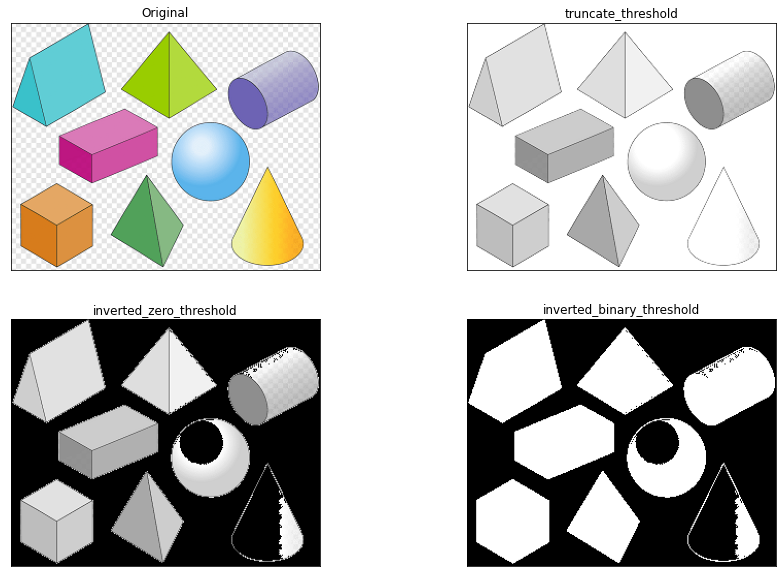

In [73]:
import cv2 as cv
import numpy as np
import matplotlib.pylab as plt

img=cv.imread('shapes.png',0)             #read image in graysacle
image=plt.imread('shapes.png')

T = get_threshold(img)                    #generate threshold

trun_thresh_img = trun_threshold(img)     # getting resultant images from functions
inverted_zero_thresh_img = inverted_zero_threshold(img)
inverted_binary_thresh_img = inverted_binary_threshold(img)

plt.figure(figsize=(15,10))               #plotting thresholded images
plt.subplot(221)
plt.imshow(image)
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(222)
plt.imshow(trun_thresh_img, cmap='gray')
plt.title('truncate_threshold')
plt.xticks([])
plt.yticks([])

plt.subplot(223)
plt.imshow(inverted_zero_thresh_img, cmap='gray')
plt.title('inverted_zero_threshold')
plt.xticks([])
plt.yticks([])

plt.subplot(224)
plt.imshow(inverted_binary_thresh_img, cmap='gray')
plt.title('inverted_binary_threshold')
plt.xticks([])
plt.yticks([])

plt.savefig("results.png")

In [66]:
def get_threshold(im):                           #function that generates threshold of given image using 'averaging' method
    t_old=im.mean()
    
    while True:
        foreground_img = (im > t_old) * im       #making G1
        background_img = (im <= t_old) * im      #making G2
    
        mean1 = foreground_img.mean()
        mean2 = background_img.mean()
    
        t_new = (mean1 + mean2) / 2
    
        #print(t_old)
        #print(t_new)
    
        diff = t_new - t_old
    
        #print(diff)
    
        if diff > 1e-4:
            t_old = t_new
        else:
            break
            
    return t_old            #returning threshold


In [67]:
def trun_threshold(im):    # a fuction creates truncate thresholding of given img, & returns it
    r,c=im.shape
    img2 = np.zeros((r,c), dtype=np.uint8)
    
    for i in range (r):
        for j in range (c):
            if im[i,j] > T:
                img2[i,j] = T
            else:
                img2[i,j] = im[i,j]
    return img2

In [68]:
def inverted_zero_threshold(im):    # a fuction creates inverted zero thresholding of given img, & returns it
    r,c=im.shape
    img3 = np.zeros((r,c), dtype=np.uint8)
    
    for i in range (r):
        for j in range (c):
            if im[i,j] > T:
                img3[i,j] = 0
            else:
                img3[i,j] = im[i,j]
    return img3

In [69]:
def inverted_binary_threshold(im):    # a fuction creates inverted binary thresholding of given img, & returns it
    r,c=im.shape
    img4 = np.zeros((r,c), dtype=np.uint8)
    max_gray_level = im.max()         # finding maximum gray level of image
    
    for i in range (r):
        for j in range (c):
            if im[i,j] > T:
                img4[i,j] = 0
            else:
                img4[i,j] = max_gray_level
    return img4